In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataset import *
valid_dir = '../input/czii-cryo-et-object-identification/train'
# Load the data
image = read_one_data("TS_6_4",static_dir=f'{valid_dir}/static/ExperimentRuns')
label = np.load(f"../input/mask/train_label_TS_6_4.npy")

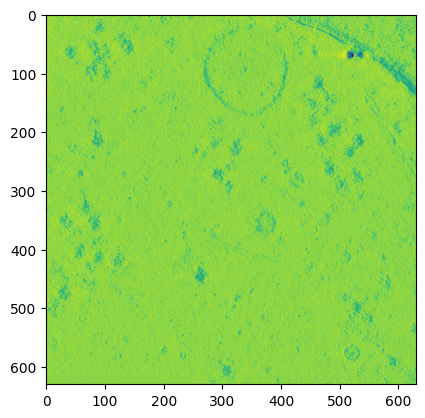

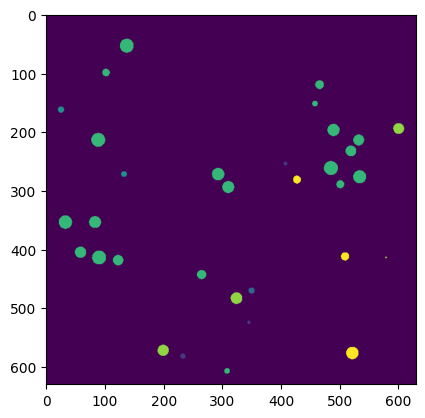

In [2]:
#90枚目の画像を表示
plt.imshow(image[90])
plt.show()
plt.imshow(label[90])
plt.show()

In [3]:
import torch
import torch.nn.functional as F
import numpy as np

# NumPy配列をPyTorchテンソルに変換
labels = torch.from_numpy(label).long()  # 整数型に変換

# ロジットの作成（正しいクラスに高いスコアを与える）
logit = torch.rand((*labels.shape, 7), dtype=torch.float32) * 2 - 1  # 値の範囲 [-1, 1]
logit.scatter_(3, labels.unsqueeze(-1), 2)  # 正しいクラスに高いスコアを設定

logit_shifted = torch.roll(logit, shifts=10, dims=1)


# F.cross_entropyを使用してクロスエントロピー損失を計算
loss = F.cross_entropy(logit_shifted.permute(0, 3, 1, 2), labels)

# 出力
print(f"Cross entropy loss: {loss.item()}")


Cross entropy loss: 0.6902936697006226


In [4]:
#logitを画像に変換
logit = logit.numpy()
logit = logit.squeeze()
print(logit.shape)

(184, 630, 630, 7)


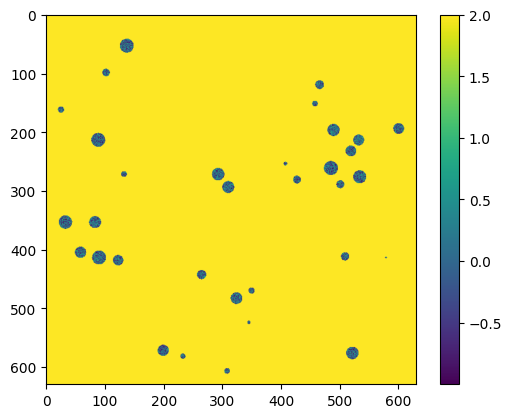

In [5]:
#90枚目の画像を表示
plt.imshow(logit[90, :, :, 0])
plt.colorbar()
plt.show()

In [10]:
target = torch.from_numpy(np.random.choice(7, (2, 32, 640, 640))).long()
logit = torch.rand((2, 7,32, 640, 640), dtype=torch.float32)
print(target.shape), print(logit.shape)

torch.Size([2, 32, 640, 640])
torch.Size([2, 7, 32, 640, 640])


(None, None)

In [ ]:
F.cross_entropy(logit, target)

tensor(1.9814)

In [14]:
new_mask =torch.rand((2, 7,32, 640, 640), dtype=torch.float32)

loss = F.cross_entropy(logit, new_mask)
print(loss)

tensor(6.9350)
